Useful links:
* [Project brief](https://docs.google.com/document/d/1UDUbzByMpLECCsGrYg-1UPHffm0rGMyyWBe1hvp-5UA/edit?usp=sharing)
* [Google drive folder](https://drive.google.com/drive/folders/1eAgeqAZVkgFnd1OnNjJ3NklnJxw8Ih1C?usp=sharing.)

# Setup

In [ ]:
#Basic setup 
import nest_asyncio
import pandas as pd
import numpy as np 

import datetime
from datetime import datetime
import json
import ast
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem.porter import *

import nltk 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

pd.set_option('display.max_columns', 100) #Displays upto 100 columns
pd.set_option('display.max_rows', 100) #Displays up to 100 rows
nest_asyncio.apply() #What does this do?

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Sentiment Trading/msft_labelled.csv')

In [ ]:
df

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,near,geo,source,translate,trans_src,trans_dest,reply_to.user_id,reply_to.username,labelled_tweet
0,1,1321240112928231424,1321240112928231424,2020-10-27 23:59:25 GMT,2020-10-27,23:59:25,0,1152551167089451009,earningsahead,Earnings Ahead,NaN,citi long,en,[],['https://www.cnbc.com/2020/10/27/stocks-makin...,[],0,0,0,[],"['MSFT', 'FSLR', 'FEYE', 'A', 'JNPR']",https://twitter.com/EarningsAhead/status/13212...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
1,2,1321240001754112002,1321206389872754690,2020-10-27 23:58:58 GMT,2020-10-27,23:58:58,0,1221784419041792000,fools_gd,ShipOfFoolsGD,NaN,pain,en,['investing_city'],[],[],0,0,3,[],['msft'],https://twitter.com/fools_gd/status/1321240001...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.961980e+09,investing_city,neutral
2,5,1321239606721957888,1321239606721957888,2020-10-27 23:57:24 GMT,2020-10-27,23:57:24,0,211010957,iliketotweettou,Brian Firestone,NaN,down,en,[],[],[],0,0,0,[],"['aapl', 'amzn', 'abbv', 'ba', 'bhc', 'brk', '...",https://twitter.com/IliketotweettoU/status/132...,https://twitter.com/Reuters/status/13212177870...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
3,6,1321239221349294081,1321230301142671361,2020-10-27 23:55:52 GMT,2020-10-27,23:55:52,0,860675555955539972,flyrusr,Usr Flyr,NaN,nice quarter beat think that make,et,['axelroark'],[],['https://pbs.twimg.com/media/ElX8EXAXYAAMBwb....,0,0,0,[],['MSFT'],https://twitter.com/FlyrUsr/status/13212392213...,NaN,1,https://pbs.twimg.com/media/ElX8EXAXYAAMBwb.jpg,NaN,NaN,NaN,NaN,NaN,NaN,1.056708e+18,axelroark,neutral
4,10,1321238918084370432,1321238918084370432,2020-10-27 23:54:40 GMT,2020-10-27,23:54:40,0,898295599245742081,humewoodcastle,HumewoodCastle,NaN,microsoft earn continu ride pandem fuel demand...,en,[],[],[],0,0,2,[],['MSFT'],https://twitter.com/HumewoodCastle/status/1321...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
5,11,1321238738354229248,1321238738354229248,2020-10-27 23:53:57 GMT,2020-10-27,23:53:57,0,1092618466379685888,sharpstreetcap,Sharp street trading insights,NaN,microsoft earn continu ride pandem fuel demand...,en,[],[],[],1,0,1,[],['MSFT'],https://twitter.com/SharpStreetCap/status/1321...,https://twitter.com/SharpStreetCap/status/1321...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
6,14,1321238226397499392,1321238226397499392,2020-10-27 23:51:55 GMT,2020-10-27,23:51:55,0,477372678,landywingard,Landy Wingard,NaN,microsoft drop again,en,[],[],[],0,0,0,"['azure', 'xbox', 'd365']","['MSFT', 'AMZN', 'WORK', 'ZM']",https://twitter.com/LandyWingard/status/132123...,https://twitter.com/CNBCnow/status/13211837991...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
7,16,1321237873480400899,1321237873480400899,2020-10-27 23:50:31 GMT,2020-10-27,23:50:31,0,302349992,stoxline,Stoxline Investing,NaN,microsoft result will depend azur growth pande...,en,[],['http://www.stoxline.com/stock_ranks.php?p=NA...,[],0,1,0,"['nasdaq', 'insignia', 'intel', 'cisco', 'xili...","['ISIG', 'INTC', 'CSCO', 'XLNX', 'MSFT', 'DKNG...",https://twitter.com/stoxline/status/1321237873...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
8,17,1321237723475288068,1321237723475288068,2020-10-27 23:49:55 GMT,2020-10-27,23:49:55,0,2172626998,pjl001,PeterLekousesJr,NaN,investor held onto post collaps well year late...,en,[],['https://seekingalpha.com/article/4381897-mic...,[],0,0,1,[],['MSFT'],https://twitter.com/pjl001/status/132123772347...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
9,18,1321237707973156864,1321237707973156864,2020-10-27 23:49:51 GMT,2020-10-27,23:49:51,0,211010957,iliketotweettou,Brian Firestone,NaN,observ invest space will want miss thi webinar...,en,[],[],['https://pbs.twimg.com/media/ElX6ruQW0AAjP4n....,0,0,0,[],"['IBM', 'aapl', 'amzn', 'abbv', 'ba', 'bhc', '...",https://twitter.com/IliketotweettoU/status/13

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Sentiment Trading/8201_embeddings_series.csv')

In [ ]:
df2

,tweet
0,[-2.84913301e-01 9.56378818e-01 4.04570043e-...
1,[-1.56786904e-01 8.12137127e-01 -3.99960071e-...
2,[-1.29247710e-01 8.71835709e-01 -9.97924984e-...
3,[-1.23210914e-01 9.80035186e-01 -6.65708959e-...
4,[-0.0511896 0.995928 -0.975378 0.895771...
...,...
8196,[ 1.77521333e-01 8.45737040e-01 -9.27612484e-...
8197,[-0.13759877 0.9159997 -0.9925551 0.881176...
8198,[-0.12503853 0.97624135 -0.9298542 0.668369...
8199,[-0.3014028 0.9792029 -0.9874648 0.006258...


# Scraping tweets  


In [ ]:
'''
Python script used to generate the file 'tsla.csv' (superceded) 

import pandas as pd
import twint

c = twint.Config()

c.Since = "2020-10-27"
c.Search = "$TSLA"

twint.run.Search(c)

# after saving and cleaning the terminal output
import pandas as pd
f = open("tsla.txt", "r")

data = []
for line in f:
    data.append(line.split(' ',5))
df = pd.DataFrame(data, columns = ['id','date','time','gmt','username','tweet'])
df.to_csv('tsla.csv')
'''

In [ ]:
'''
#twitter_scraper.py (superceded)

import pandas as pd
import twint
import json

keyword_list=[]
while True:
    user_input=input('input a keyword;\ntype NA to stop adding keywords > ')
    if user_input=='NA':break
    else:keyword_list.append(user_input)

keywords=' OR '.join(keyword_list)
print('keywords are:',keywords)

def date_func(command):
    req_input=None
    while req_input is None:
        user_input=input(command)
        try:
            if user_input=='NA':
                req_input=user_input
            elif user_input[4]=='-' and user_input[7]=='-' and len(user_input)==10:
                req_input=user_input
        except: print('ensure input date follows specified format')
    return req_input

date_start=date_func('input start date of tweets in yyyy-mm-dd format;\nif no start date to input, indicate NA > ')
print('extracting tweets from: ',date_start)

date_end=date_func('input end date of tweets in yyyy-mm-dd format;\nif no end date to input, indicate NA > ')
print('extracting tweets until: ',date_end)

date_start=str(date_start)
if date_start=='NA':date_start=None
date_end=str(date_end)
if date_end=='NA':date_end=None
keywords=str(keywords)

num_input=None
while num_input is None:
    user_input = input('input number of tweets to retrieve > ')
    try:
        req_input = int(user_input)
        num_input = req_input
    except: print('ensure input is a number')

json_filename = input('filename ending with .json > ')
csv_filename = json_filename[:-5]+'.csv'
print('saved as', json_filename, 'and', csv_filename)

c = twint.Config()
c.Since = date_start
c.Until = date_end
c.Search = keywords
c.Limit = num_input
c.Store_json = True
c.Output = json_filename

twint.run.Search(c)

# stuff that are lists: mentions, urls, photos, hashtags, cashtags

tweets = []
for line in open(json_filename, 'r'):
    tweets.append(json.loads(line))
tweets=[pd.json_normalize(t) for t in tweets]
df = pd.concat(tweets)
df.to_csv(csv_filename)
'''

In [ ]:
''' tweet_price_scraper.py
import pandas as pd
import twint
import yfinance as yf

# ticker; keywords
ticker_name = "^GSPC"
keywords = "spx OR s&p OR snp500 OR snp_500 OR s&p500 OR s&p_500 OR sp500 OR sp_500 OR S&P 500"

# time horizon
start_date = "2020-10-01"
end_date = "2020-11-30"

# filenames and information
filename = "{}_{}_{}".format(ticker_name, start_date.replace("-",""), end_date.replace("-",""))
price_filename = "price_{}.csv".format(filename)
tweet_json_filename = "tweet_{}.json".format(filename)
print(filename, price_filename, tweet_json_filename)

# scrape from yfinance
yfin = yf.Ticker(ticker_name)
yfin_historical = yfin.history(start=start_date, end=end_date, interval="1d")
yfin_historical.to_csv(price_filename)

# scrape from Twitter
c = twint.Config()
c.Since = start_date
c.Until = end_date
c.Search = keywords
# c.Limit = num_input
c.Store_json = True
c.Output = tweet_json_filename
twint.run.Search(c)
'''

In [ ]:
''' process.py
import pandas as pd
import json

# remember to input json_filename
json_filename  = "tweet_^GSPC_20201001_20201130.json"
csv_filename = "{}.csv".format(json_filename[:-5])

tweets = []
for line in open(json_filename, 'r'):
    tweets.append(json.loads(line))
tweets=[pd.json_normalize(t) for t in tweets]
df = pd.concat(tweets)
df.to_csv(csv_filename)

print('saved as', json_filename, 'and', csv_filename)
'''

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Sentiment Trading/tweet_^GSPC_20201001_20201130.csv')
df_test = pd.read_csv('/content/drive/My Drive/Sentiment Trading/Stock_Market_Sentiment_Dataset.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,10,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning tweets


In [ ]:
#Amanda and Josephine's code
#Doesn't work with tsla.csv, since this contains fewer columns 
#Designed to work with tweet_^GSPC_20201001_20201130.csv and similar files

#Introduce a parameter c, the column name of the column containing tweets

def oldCleaner(df):
  pre_len = len(df)
  df = df[df['language'].isin(['en'])]

  post_len = len(df)
  print('length before: {}, length after keeping only english tweets: {}'.format(pre_len, post_len))

  # strings to lists (where applicable)
  pre_type = type(df['cashtags'].loc[1])
  to_list_col = ['mentions','urls','photos','hashtags','cashtags']

  for col in to_list_col:
      df[col] = df[col].apply(lambda x: ast.literal_eval(x))

  post_type = type(df['cashtags'].loc[1])
  print('type before: {}, type after conversion: {}'.format(pre_type, post_type))

  # count punctuation '!', '?'
  df['?'] = df['tweet'].apply(lambda x: x.count('?'))
  df['!'] = df['tweet'].apply(lambda x: x.count('!'))

  # remove URLs, mentions, cashtags, punctuation
  def clean_tweet(i):
    t = df['tweet'][i]

    # remove URLS
    for u in df['urls'][i]:
        t = t.replace(u, "")

    # remove mentions
    for m in df['mentions'][i]:
        m = '@' + m
        t = t.replace(m, "")

    # remove cashtags
    for c in df['cashtags'][i]:
        c = '$' + c
        t = t.replace(c, "")
    
    # reassign
    df['tweet'][i] = t

    for i in df.index:
        clean_tweet(i)

  # remove punctuation
  df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

  # remove urls from tweets
  df['tweet'] = df['tweet'].apply(lambda x: re.sub("(#[A-Za-z0-9]+)|"
    + "(\\$[A-Za-z]+)|(@[A-Za-z0-9]+)|http[^ ]+|/\r?\n|\r/}", "", x))  

  # convert time to datetime
  df['datetime'] = df['date'] + " " + df['time']
  df['datetime'] = df['datetime'].apply(lambda dt:(datetime.strptime(dt,'%Y-%m-%d %H:%M:%S')))

  print("unique timezones: {}".format(df['timezone'].nunique()))
  print("no need to change to timezone aware object")

  # keep only relevant columns
  df = df[['datetime','tweet','replies_count','retweets_count','likes_count','?','!']]
  #df.dtypes

  # remove short words, length <=3
  df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

  '''
  def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text 
    
  df['tweet'] = lemmatizer(df['tweet'])
  '''

  #stemming
  # separate into individual words, ie tokenization
  tokenized_tweet = df['tweet'].apply(lambda x: x.split())
  stemmer = PorterStemmer()
  tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
  tokenized_tweet = tokenized_tweet.reset_index(drop=True) 
  for i in range(len(tokenized_tweet)):
      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  df['tweet'] = tokenized_tweet

  # drop NaN tweets
  df = df[df.tweet.notna()]
  df = df.reset_index(drop = True)

  return df

In [ ]:
#Amanda and Josephine's code
#Doesn't work with tsla.csv, since this contains fewer columns 
#Designed to work with tweet_^GSPC_20201001_20201130.csv and similar files

#c is the column name of the column containing tweets

def mainCleaner(df, c):
  pre_len = len(df)
  df = df[df['language'].isin(['en'])]

  post_len = len(df)
  print('length before: {}, length after keeping only english tweets: {}'.format(pre_len, post_len))

  # strings to lists (where applicable)
  pre_type = type(df['cashtags'].loc[1])
  to_list_col = ['mentions','urls','photos','hashtags','cashtags']

  for col in to_list_col:
      df[col] = df[col].apply(lambda x: ast.literal_eval(x))

  post_type = type(df['cashtags'].loc[1])
  print('type before: {}, type after conversion: {}'.format(pre_type, post_type))

  # count punctuation '!', '?'
  df['?'] = df[c].apply(lambda x: x.count('?'))
  df['!'] = df[c].apply(lambda x: x.count('!'))

  # remove URLs, mentions, cashtags, punctuation
  def clean_tweet(i):
    t = df[c][i]

    # remove URLS
    for u in df['urls'][i]:
        t = t.replace(u, "")

    # remove mentions
    for m in df['mentions'][i]:
        m = '@' + m
        t = t.replace(m, "")

    # remove cashtags
    for k in df['cashtags'][i]:
        k = '$' + k
        t = t.replace(k, "")
    
    # reassign
    df[c][i] = t

    for i in df.index:
        clean_tweet(i)

  # remove punctuation
  df[c] = df[c].apply(lambda x: re.sub(r'[^\w\s]', '', x))

  # remove urls from tweets
  df[c] = df[c].apply(lambda x: re.sub("(#[A-Za-z0-9]+)|"
    + "(\\$[A-Za-z]+)|(@[A-Za-z0-9]+)|http[^ ]+|/\r?\n|\r/}", "", x))  

  # convert time to datetime
  df['datetime'] = df['date'] + " " + df['time']
  df['datetime'] = df['datetime'].apply(lambda dt:(datetime.strptime(dt,'%Y-%m-%d %H:%M:%S')))

  print("unique timezones: {}".format(df['timezone'].nunique()))
  print("no need to change to timezone aware object")

  # keep only relevant columns
  df = df[['datetime','tweet','replies_count','retweets_count','likes_count','?','!']]
  #df.dtypes

  # remove short words, length <=3
  df[c] = df[c].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

  def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text 
    
  df[c] = lemmatizer(df[c])

  '''
  #stemming
  # separate into individual words, ie tokenization
  tokenized_tweet = df[c].apply(lambda x: x.split())
  stemmer = PorterStemmer()
  tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
  tokenized_tweet = tokenized_tweet.reset_index(drop=True) 
  for i in range(len(tokenized_tweet)):
      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  df[c] = tokenized_tweet
  '''

  # drop NaN tweets
  df = df[df[c].notna()]
  df = df.reset_index(drop = True)

  return df

In [ ]:
#Designed to work with Stock-Market Sentiment Dataset.csv
#Should do the same as mainCleaner, where applicable

def testCleaner(df, c): 
  
  # count punctuation '!', '?'
  df['?'] = df[c].apply(lambda x: x.count('?'))
  df['!'] = df[c].apply(lambda x: x.count('!'))

  # remove punctuation
  df[c] = df[c].apply(lambda x: re.sub(r'[^\w\s]', '', x))

  # remove urls from tweets
  df[c] = df[c].apply(lambda x: re.sub("(#[A-Za-z0-9]+)|"
    + "(\\$[A-Za-z]+)|(@[A-Za-z0-9]+)|http[^ ]+|/\r?\n|\r/}", "", x))  

  # remove short words, length <=3
  df[c] = df[c].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

  def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text 
    
  df[c] = lemmatizer(df[c])

  '''
  #stemming
  # separate into individual words, ie tokenization
  tokenized_tweet = df[c].apply(lambda x: x.split())
  stemmer = PorterStemmer()
  tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
  tokenized_tweet = tokenized_tweet.reset_index(drop=True) 
  for i in range(len(tokenized_tweet)):
      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  df[c] = tokenized_tweet
  '''

  # drop NaN tweets
  df = df[df[c].notna()]
  df = df.reset_index(drop = True)

  return df

In [ ]:
df_clean = mainCleaner(df, 'tweet')
df_test_clean = testCleaner(df_test, 'Text')

length before: 66945, length after keeping only english tweets: 47402


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


type before: <class 'str'>, type after conversion: <class 'list'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

unique timezones: 1
no need to change to timezone aware object


In [ ]:
#Restricting to tweets with at least one like and one retweet
#the dataset is too big right now
#This may improve tweet quality as well 

df_clean = df_clean[df_clean['likes_count'] > 0]
df_clean = df_clean[df_clean['retweets_count'] > 0]
df_clean = df_clean.reset_index(drop = True)

# Modelling: FinBERT


> Implementing an existing FinBERT model

BERT can be used for feature extraction (i.e. to create contextualised word embeddings or sentence/paragaph embeddings), or it can be fine-tuned (scroll down). FinBERT is a fine-tuned BERT model which classifies text; it's pre-trained on the FinancialPhraseBank-v1.0. 
See


*  https://jalammar.github.io/illustrated-bert/
*  https://medium.com/prosus-ai-tech-blog/finbert-financial-sentiment-analysis-with-bert-b277a3607101



---

An example implementing FinBERT: https://www.youtube.com/watch?v=7VfkLBJbKoQ&feature=youtu.be

Repo: https://github.com/neoyipeng2018/sgx-sent

---

Obviously, this method combines vectorization and modelling (steps 3 and 4 in my plan) into one. We could go on to the trading part of the project right away. 


But we don't learn much by doing this; only that it can be done.

In [ ]:
!pip install transformers 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#from transformers import BertTokenizer, BertForSequenceClassification
import torch

     |████████████████████████████████| 1.4MB 7.9MB/s 
     |████████████████████████████████| 890kB 27.9MB/s 
     |████████████████████████████████| 2.9MB 49.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=f020abd45c1082250feee98085632fbed491210bc98f945670df6a549657ad69
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


The code below will probably expire in a few months, just like the code in the cell above. 
In general, it may be worth finding more "official" libraries which are more likely to be maintained, e.g. AllenNLP or TensorFlow.

Link to repo:
https://github.com/ipuneetrathore/BERT_models/blob/master/README.md

Link to model on huggingface.co: 
https://huggingface.co/ipuneetrathore/bert-base-cased-finetuned-finBERT

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")
model = AutoModelForSequenceClassification.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")

In [ ]:
#See top of 5th cell in
#https://github.com/ipuneetrathore/BERT_models/blob/master/Running%20finBERT%20-%20How%20To.ipynb

label_list = ['negative', 'neutral', 'positive']

In [ ]:
#Demo; change input and observe output

inputs = tokenizer("The stock market is going terribly well", return_tensors="pt")
outputs = model(**inputs)
label_list[torch.argmax(outputs[0])]

'negative'

In [ ]:
def label(t):
  inputs = tokenizer(t, return_tensors="pt")
  outputs = model(**inputs)
  return label_list[torch.argmax(outputs[0])]

#This cell takes a while to execute; just over 100 minutes (for tsla.csv)
df_clean['FinBERT_label'] = df_clean['tweet'].apply(lambda x: label(x))

#To save us from having to do this again
df_clean.to_csv('/content/drive/My Drive/Sentiment Trading/GSPC_subset_labelled.csv', index=False)

In [ ]:
#Import FinBERT labelled datasets
df_clean = pd.read_csv('/content/drive/My Drive/Sentiment Trading/GSPC_subset_labelled.csv')
df_test_clean = pd.read_csv('/content/drive/My Drive/Sentiment Trading/Stock_Market_Sentiment_Dataset_labelled.csv')

In [ ]:
#Convert labels to numerical values 
def convert_label(t):
  if t == 'neutral':
    return 0
  elif t == 'positive':
    return 1
  else:
    return -1

df_clean['FinBERT_label'] = df_clean['FinBERT_label'].apply(lambda x: convert_label(x))
df_test_clean['FinBERT_label'] = df_test_clean['FinBERT_label'].apply(lambda x: convert_label(x))

In [ ]:
#FinBERT produces 3 labels, but our test dataset has only 2,
#So we'll ignore the tweets with FinBERT label 0
df_test_clean = df_test_clean[df_test_clean['FinBERT_label'] != 0]

In [ ]:
#Add the actual and FinBERT label values
#If the labels match (both 1 or both -1) then |sum| = 2
#If the labels don't match, the sum is 0
df_test_clean['Sum'] = df_test_clean['Sentiment'] + df_test_clean['FinBERT_label']

In [ ]:
#Testing accuracy of FinBERT labels using Stock_Market_Sentiment_Dataset.csv
print(df_test_clean['Sum'].value_counts()[0], " out of ", df_test_clean.shape[0], " labels don't match")
print("Accuracy = ", 1 - (df_test_clean['Sum'].value_counts()[0] / df_test_clean.shape[0]))

175  out of  791  labels don't match
Accuracy =  0.7787610619469026


78% accuracy is really decent, considering that FinBERT was not trained on Stock_Market_Sentiment_Dataset at all. 

Note that we don't know who labelled Stock_Market_Sentiment_Dataset.csv; it could even be another sentiment analysis model.

# Modelling: BERT Unsupervised



> **Obtaining vector representations of tweets**


We'll attempt to follow the [TensorFlow guide](https://www.tensorflow.org/tutorials/text/classify_text_with_bert) to classifying text with BERT. Our aim is simply to use BERT to obtain vector representations of tweets, i.e. to find an 'embedding' for each tweet (just as a model like word2vec outputs an embedding for each word).


Differences:
*   They use the [Large Movie Review Dataset](https://ai.stanford.edu/%7Eamaas/data/sentiment/), which consists of **labelled** movie reviews.
*   Their aim is to fine-tune a BERT model.



In [ ]:
#Setup
!pip install -q tensorflow-text
!pip install -q tf-models-official 
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optmizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
#Loading a model from TensorFlow hub

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' #Why did we choose this one? 
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1'
#Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT. TensorFlow Hub provides a matching preprocessing model for each of the BERT model
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1


In [ ]:
def embed(t):
  text_test = [t]
  text_preprocessed = bert_preprocess_model(text_test)
  bert_results = bert_model(text_preprocessed)
  return bert_results["pooled_output"].numpy()[0] #[[1, 2, 3, ...]]

#This probably takes a while. 
#In fact, not enough RAM to execute at once, so need to do it for subsets and stitch together.
#df_clean['embedding'] = df_clean['tweet'].apply(lambda x: embed(x))

#To save us from having to do this again.
#Our embeddings get converted from np.array to str, but it's easy to convert them back.
#df_clean.to_csv('/content/drive/My Drive/Sentiment Trading/_____.csv', index=False)

For some reason, after running the cell above for about 12 mins, the runtime crashes due to insufficient RAM. The RAM used is around 2GB at minute 12, then explodes. 

In [ ]:
for i in range(len(df_clean)):
  embed(df_clean['tweet'][i])
  print (i)

When running the cell above, the runtime crashed when the range was 2350 and another time when it was 2076. The only option might be to do batches of 1 or 2 thousand and stitch them together. It made no difference using a TPU runtime. 

In [ ]:
''' Like so: restart the runtime after executing each block
#Change df_clean_tweet and save the output each time
s = df_test_clean['Text'][0:1500]
se = s.apply(lambda x: embed(x))
se.to_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings1.csv', index=False)

#Change df_clean_tweet and save the output each time
s = df_test_clean['Text'][1500:3000]
se = s.apply(lambda x: embed(x))
se.to_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings2.csv', index=False)

#Change df_clean_tweet and save the output each time
s = df_test_clean['Text'][3000:4500]
se = s.apply(lambda x: embed(x))
se.to_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings3.csv', index=False)

#Change df_clean_tweet and save the output each time
s = df_test_clean['Text'][4500:]
se = s.apply(lambda x: embed(x))
se.to_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings4.csv', index=False)

x = pd.read_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings1.csv')
y = pd.read_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings2.csv')
z = pd.read_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings3.csv')
w = pd.read_csv('/content/drive/My Drive/Sentiment Trading/SMSDembeddings4.csv')
x = x['Text'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
y = y['Text'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
z = z['Text'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
w = w['Text'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
df_test_clean['BERT_embedding'] = pd.concat([x, y, z, w], ignore_index = True)
df_test_clean.to_csv('/content/drive/My Drive/Sentiment Trading/SMSD_labelled.csv', index = False)
'''

In [ ]:
#I've now added BERT embeddings to the subset of GSCP, which can be imported here
df_clean = pd.read_csv('/content/drive/My Drive/Sentiment Trading/GSPC_subset_labelled.csv')
#df_clean = pd.read_csv('/content/drive/My Drive/Sentiment Trading/SMSD_labelled.csv')
#Convert BERT_embeddings from str to np.array
df_clean['BERT_embedding'] = df_clean['BERT_embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

In [ ]:
#I've now added BERT embeddings to Stock_Market_Sentiment_Dataset.csv, which can be imported here
df_test_clean = pd.read_csv('/content/drive/My Drive/Sentiment Trading/SMSD_labelled.csv')
#Convert BERT_embeddings from str to np.array
df_test_clean['BERT_embedding'] = df_test_clean['BERT_embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))



> **Clustering the tweet embeddings we've obtained**

How do we use these vectors in an unsupervised algorithm?

We want to group unlabelled vector representations of tweets, so perhaps the most obvious approach is to use a clustering algorithm (see https://developers.google.com/machine-learning/clustering/clustering-algorithms). TensorFlow doesn't have any examples implenting clustering algorithms, so we'll use sklearn. See https://scikit-learn.org/stable/modules/clustering.html#k-means.
*   What is the distribution of our data? It's in a 512-dimensional space, so can we visualise it or not? It's possible, see https://experiments.withgoogle.com/visualizing-high-dimensional-space. To implement, see https://www.youtube.com/watch?v=85XaciPBCkw. This is helpful as it may help us select which clustering algorithm variant to use.
*   We can use hierarchical clustering, by clustering neutral and non-neutral tweets first, then clustering the non-neutral tweets into positive and negative. 


> **Visualising embeddings**

I thought it would be helpful to know what our data looks like when deciding which clustering algorithm to use. Even if it's not, this is a nice detour. 

In [ ]:
#Each of the 512 entries in an embedding should be treated as the column of a dataframe

#Create a matrix of embeddings: each row is one embedding. We expect it to be an n x 512 matrix
embeddings = np.array([df_clean['BERT_embedding'][0]])
for e in df_clean['BERT_embedding']:
  embeddings = np.append(embeddings, [e], axis = 0)

embeddings = embeddings[1:] #The first embedding was added twice

#Convert this matrix into a dataframe 
df_BERT_embeddings = pd.DataFrame(data = embeddings)

In [ ]:
from sklearn.manifold import TSNE 

m = TSNE(learning_rate = 50) #Learning rate is typically between 10 and 1000
tsne_features = m.fit_transform(df_BERT_embeddings)

df_tsne_features = pd.DataFrame()
df_tsne_features['x'] = tsne_features[:, 0]
df_tsne_features['y'] = tsne_features[:, 1]

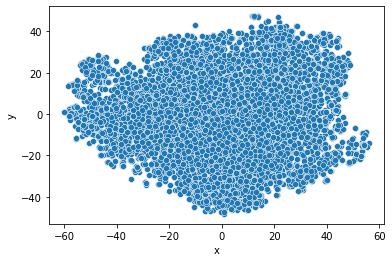

In [ ]:
import seaborn as sns

sns.scatterplot(x = "x", y = "y", data = df_tsne_features)



> **K-means clustering**

See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


In [ ]:
#Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn.cluster import KMeans

#How many clusters do we need? 
clusters = 2
kmeans = KMeans(n_clusters = clusters, random_state=0).fit(embeddings)

Surely it can't be this simple? 

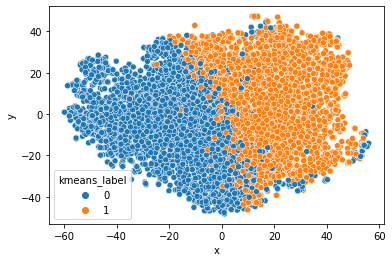

In [ ]:
#kmeans.labels_ is a np.array with a label for each vector (row) in embeddings
df_tsne_features['kmeans_label'] = kmeans.labels_

#Visualising the labels
sns.scatterplot(x = "x", y = "y", hue = 'kmeans_label', data = df_tsne_features)

We now have model-generated labels for tweets. But do these labels mean anything? 

One thing we could do is repeat the steps above for [this](https://www.kaggle.com/yash612/stockmarket-sentiment-dataset) dataset on Kaggle, and compare how often the model's label matches the actual label in the dataset. 

In [ ]:
df_clean['kmeans_label'] = df_tsne_features['kmeans_label']

0    3125
1    2666
Name: kmeans_label, dtype: int64

In [ ]:
#Testing the kmeans model with 'Stock_Market Sentiment Dataset.csv'
#We have a problem: the kmeans labels are arbitrary, so how do we decide which 
#label means positive and which label means negative?
#The correct way seems to be to estimate it from a random sample. 

#Prints the number of each type of label for each kmeans label, to judge accuracy by eye 
#This relies on the label being acccurate (i.e. use with labelled data)
for k in range(0, clusters):
  print("Actual label distribution for tweets with label", k , ":\n", 
        df_clean[df_clean['kmeans_label'] == k]['Sentiment'].value_counts())

Actual label distribution for tweets with label 0 :
  1    1952
-1    1173
Name: Sentiment, dtype: int64
Actual label distribution for tweets with label 1 :
  1    1733
-1     933
Name: Sentiment, dtype: int64


From the above we can see that the unsupervised classifier is not much better than guessing labels at random. Suppose we say tweets with label 0 are positive.

In [ ]:
def convert_label(t):
  if t == 0:
    return +1
  else:
    return -1

In [ ]:
df_clean['kmeans_label_conv'] = df_clean['kmeans_label'].apply(lambda x: convert_label(x))
print("Accuracy :", 
      df_clean[df_clean['kmeans_label_conv'] == df_clean['Sentiment']].shape[0] / df_clean.shape[0])

Accuracy : 0.3636677603177344


Now suppose we say tweets with label 0 are negative.

In [ ]:
def convert_label(t):
  if t == 0:
    return -1
  else:
    return 1

In [ ]:
df_clean['kmeans_label_conv'] = df_clean['kmeans_label'].apply(lambda x: convert_label(x))
print("Accuracy :", 
      df_clean[df_clean['kmeans_label_conv'] == df_clean['Sentiment']].shape[0] / df_clean.shape[0])

Accuracy : 0.6363322396822656


There's a clear difference here, but it depends on being able to decide what the kmeans label should be. 

The dataset is skewed (there are more tweets with +1 sentiment than -1 sentiment), but there are also more tweets with kmeans_label 0 than there are with kmeans_label 1. So, perhaps the model picked up on the skew. 

Note that we don't know who labelled Stock_Market_Sentiment_Dataset.csv; it could even be another sentiment analysis model.

# Backtesting





We now have tweets labelled with sentiment. A possible approach is to group tweets by hour, find the average/dominant sentiment of tweets for each hour and use this to create a buy / hold / sell signal for each hour (to be executed on in the next hour, to prevent information leaking from the future). We can then align this vector of signals with an hourly close price vector for the same asset and track performance based on a simple rule: buy when there's a buy signal, hold until the next sell signal, then sell, then hold until the next buy signal, and so on.

We'll try implement using this library: https://github.com/kernc/backtesting.py. Documentation is at https://kernc.github.io/backtesting.py/doc/backtesting/#gsc.tab=0

---


Can we do something better than a simple backtest? There are many parameters we can tweak for the signals and for trading itself. For example, instead of just taking the mode as the signal for a time period, the signal can be a weighted average, say between 1 and -1. Should the model buy if it's over 0.5? Or is 0.7 better? What time period does the model perform best with? Can we make a model to optimise such parameters?

In [1]:
!pip install backtesting
from backtesting import Strategy, Backtest

     |████████████████████████████████| 184kB 5.3MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.0-cp36-none-any.whl size=173602 sha256=52084ea7b007640edab6c26b1ce613b191815a65dc368662c8358330f477642c
  Stored in directory: /root/.cache/pip/wheels/ff/df/b1/f9d87cbc5e5ff92a89067c307c6fb6fa4485858f9d4de748de
Successfully built backtesting


/usr/local/lib/python3.6/dist-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [2]:
df_price = pd.read_csv('/content/drive/My Drive/Sentiment Trading/price_^GSPC_20201001_20201130.csv')
df_price = df_price.drop(['Dividends', 'Stock Splits'], axis = 1)
#Convert time to datetime
df_price['Date'] = df_price['Date'].apply(lambda dt:(datetime.strptime(dt,'%Y-%m-%d')))
df_price = df_price.set_index('Date')

NameError: ignored

In [ ]:
def convert_FinBERT(t):
  if t == 'positive':
    return 1
  elif t == 'negative':
    return -1
  else:
    return 0

def convert_kmeans(t):
  if t == 0:
    return 1
  else:
    return -1

In [ ]:
#We require that the length of signals is the same as the length of df_price
df_clean = pd.read_csv('/content/drive/My Drive/Sentiment Trading/GSPC_subset_labelled.csv')
df_clean['datetime'] = df_clean['datetime'].apply(lambda dt:(datetime.strptime(dt,'%Y-%m-%d %H:%M:%S')))
df_clean = df_clean.set_index('datetime')
df_clean['FinBERT_label'] = df_clean['FinBERT_label'].apply(lambda x: convert_FinBERT(x))
#df_clean['kmeans_label'] = df_clean['kmeans_label'].apply(lambda x: convert_kmeans(x))
#Groups by day and sums FinBERT_label for all tweets in a day, to get a sentiment score for each day
#df_clean = df_clean.resample('1D').sum()

#Lag must be at least one. Consider that we're creating a signal by aggregating
#sentiment for a time period t. The backtester doesn't always trade at the close
#price of a time period. So, if we trade on a signal from a time period in that 
#time period, then information could be leaking from the future. 
#Well, it turns out the backtester does this automatically -_-

In [ ]:
df_clean['FinBERT_label']

In [ ]:
df_clean = df_clean.resample('1D').sum()

In [ ]:
df_clean['FinBERT_label']

In [ ]:
#Issue: we have sentiment scores for weekends, but to save time we'll ignore them
df_price = df_price.join(df_clean, how = 'left')

#Rename column
df_price = df_price.rename(columns={'kmeans_label': 'Signal'})

In [ ]:
class strat1(Strategy):
    signal_strength = 5
    
    def init(self):
        #Create indicator
        #An indicator is just an array of values, but one that is revealed 
        #gradually in Strategy.next() much like Strategy.data is.
        #It accepts a function and its arguments as arguments. 
        self.signal = self.I(lambda x: x, self.data.Signal)
    
    def next(self):
        #If signal is more than signal_strength, close any existing positions and buy
        if self.signal > self.signal_strength:
            self.position.close()
            self.buy()

        #Elif signal is less than minus signal_strength, close any existing positions and sell 
        elif self.signal < -self.signal_strength:
            self.position.close()
            self.sell()

In [ ]:
bt = Backtest(df_price, strat1, cash=10_000, commission=.002)
stats = bt.run()
stats

In [ ]:
bt.plot()